# Hands-On Pertemuan 1: Pengenalan Big Data dan Overview Teknologi

## Tujuan
Pada akhir praktikum ini, mahasiswa diharapkan mampu:
1. Memahami konsep dasar Big Data.
2. Menjelaskan karakteristik dan tantangan Big Data (Volume, Variety, Velocity, dan Veracity).
3. Mengenal teknologi yang digunakan dalam ekosistem Big Data.
4. Menginstal dan mengonfigurasi Anaconda untuk bekerja dengan alat Big Data seperti Hadoop dan Spark.
5. Memulai praktik sederhana terkait pengolahan data menggunakan PySpark dan Pandas.

## Peralatan yang Dibutuhkan
1. Anaconda (untuk manajemen lingkungan)
2. Jupyter Notebook (bawaan dari Anaconda)
3. PySpark (untuk pemrosesan data skala besar)
4. Pandas (untuk data analysis)
5. Python (bawaan dari Anaconda)

## Langkah-Langkah Hands-On

### 1. Instalasi Anaconda
- **Langkah 1: Unduh dan Instal Anaconda**
  <br>Anaconda adalah platform distribusi Python yang menyertakan berbagai alat pengembangan, termasuk Jupyter Notebook. Ikuti langkah-langkah instalasi sesuai sistem operasi:
  - Unduh Anaconda: [Download Anaconda](https://www.anaconda.com/products/individual)
  - Instal sesuai instruksi yang ada di situs web tersebut (Windows/Mac/Linux).
  - Klik 2x pada installer dan tekan next next hingga instalasi selesai
  <br>

- **Langkah 2: Menginstal PySpark di Anaconda**
  <br>Setelah Anaconda terinstal, Pertama tama tambahkan environment baru untuk praktikum big data ini yang nantinya diinstal packages - packages yang diperlukan untuk melakukan pengolahan data. Environment yang saya gunakan menggunakan versi python 3.11.9 karena versi terbaru masih ditemukan beberapa bug. Kemudian setelah environment terinstall klik tombol hijau pada environment saat ini. Kemudian open in Terminal dan ketikkan perintah berikut:
  <br>
  ```bash
  pip install pyspark==3.4.1
  ```

- **Langkah 3: Menginstal Pandas**
  Untuk memudahkan data analysis, install Pandas:
  ```bash
  pip install pandas
  ```

- **Langkah 4: Menginstal Findspark**
  ```bash
  pip install findspark
  ```

- **Langkah 5: Install Open JDK**
  <br>Saat instalasi open jdk saya menginstallnya dari anaconda langsung di bagian environment --> Search packages --> cari openjdk --> lakukan instalasi

### 2. Pengenalan dan Praktik Dasar PySpark dan Pandas
- **Langkah 1: Membuka Jupyter Notebook (disini saya via VScode)**
  <br>Setelah instalasi selesai, buka VScode melalui Anaconda Navigator.

- **Langkah 2: Membuat atau membuka file ipynb**
  <br> Kemudian pilih file ipynb yang akan digunakan. Jangan lupa untuk menambahkan environment yang telah dibuat tadi untuk digunakan didalam file ipynb ini.

- **Langkah 3: Praktik dengan PySpark**
  <br>Buat program sederhana untuk memulai dengan PySpark. Gunakan PySpark untuk membuat DataFrame dan memanipulasi data sederhana:

In [6]:
# Mengimpor pustaka findspark
import findspark

# Menginisialisasi findspark untuk menemukan direktori Spark di sistem
findspark.init()


In [10]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



- **Tugas 1**: Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [11]:
# Mengimpor SparkSession dari pustaka pyspark.sql
from pyspark.sql import SparkSession

# Memulai sesi Spark dengan nama aplikasi "BigDataPractice"
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat dataset sederhana dalam bentuk list of tuples, setiap tuple berisi informasi tentang Nama, Usia, Pekerjaan, Hobi, dan Gender
data = [("Ali", 34,"Pilot","Mancing","Kustom"), 
        ("Budi", 23,"Chef","Memasak","Laki-laki"), 
        ("Citra", 29,"Artist","Menggambar","Perempuan"), 
        ("Dina", 45,"Penyanyi","Nyanyi","Perempuan")]

# Mendefinisikan kolom untuk DataFrame
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]

# Membuat DataFrame dari data dan kolom yang telah didefinisikan menggunakan Spark
df = spark.createDataFrame(data, columns)

# Menampilkan isi DataFrame di konsol
df.show()


+-----+----+---------+----------+---------+
| Nama|Usia|Pekerjaan|      Hobi|   Gender|
+-----+----+---------+----------+---------+
|  Ali|  34|    Pilot|   Mancing|   Kustom|
| Budi|  23|     Chef|   Memasak|Laki-laki|
|Citra|  29|   Artist|Menggambar|Perempuan|
| Dina|  45| Penyanyi|    Nyanyi|Perempuan|
+-----+----+---------+----------+---------+



### 3. Praktik PySpark Lanjutan
- **Latihan 1**: Memanipulasi Data dengan PySpark.

In [12]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 20)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [19]:
# Mengimpor SparkSession dari pustaka pyspark.sql
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34,150), ("Budi", 23,160), ("Citra",29, 170), ("Dina",45, 170)]
columns = ["Nama", "Usia", "TinggiBadan"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 20)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()#Untuk penghitungan rata-rata

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=True)#ascending true artinya data urut dari yang paling kecil ke paling besar
df_sorted.show()#untuk menampilkan data yang telah di sort


+-----+----+-----------+
| Nama|Usia|TinggiBadan|
+-----+----+-----------+
|  Ali|  34|        150|
| Budi|  23|        160|
|Citra|  29|        170|
| Dina|  45|        170|
+-----+----+-----------+

+-----+----+-----------+
| Nama|Usia|TinggiBadan|
+-----+----+-----------+
|  Ali|  34|        150|
| Budi|  23|        160|
|Citra|  29|        170|
| Dina|  45|        170|
+-----+----+-----------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+-----------+
| Nama|Usia|TinggiBadan|
+-----+----+-----------+
| Budi|  23|        160|
|Citra|  29|        170|
|  Ali|  34|        150|
| Dina|  45|        170|
+-----+----+-----------+



### 4. Praktik dengan Pandas
- **Latihan 2**:  Buat DataFrame menggunakan Pandas:

In [5]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

In [13]:
# Mengimpor pustaka Pandas
import pandas as pd

# Membuat DataFrame Pandas dengan data berupa nama dan usia
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], 
               "Usia": [34, 23, 29, 45],
               "TinggiBadan": [150,160,170,180]}

# Mengubah data menjadi DataFrame Pandas
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas awal sebelum filtering
print("="*70)
print("DataFrame awal:")
print(df_pandas)

# Filtering: Memilih baris di mana kolom 'Usia' memiliki nilai lebih dari 30
df_filtered = df_pandas[df_pandas["Usia"] > 30]

# Menampilkan DataFrame setelah dilakukan filtering berdasarkan usia
print("="*70)
print("DataFrame setelah filtering berdasarkan usia > 30:")
print(df_filtered)

# Filtering: Memilih baris di mana kolom 'TInggiBadan' memiliki tinggi lebih dari 160
df_filtered_tinggi = df_pandas[df_pandas["TinggiBadan"] > 160]

# Menampilkan DataFrame setelah dilakukan filtering berdasarkan usia
print("="*70)
print("DataFrame setelah filtering berdasarkan Tinggibadan > 160:")
print(df_filtered_tinggi)

# Menghitung rata-rata TinggiBadan dari DataFrame awal
rata_tinggi = df_pandas["TinggiBadan"].mean()

# Menampilkan hasil rata-rata TinggiBadan
print("="*70)
print("Rata-rata TB adalah:", rata_tinggi)
print("="*70)


DataFrame awal:
    Nama  Usia  TinggiBadan
0    Ali    34          150
1   Budi    23          160
2  Citra    29          170
3   Dina    45          180
DataFrame setelah filtering berdasarkan usia > 30:
   Nama  Usia  TinggiBadan
0   Ali    34          150
3  Dina    45          180
DataFrame setelah filtering berdasarkan Tinggibadan > 160:
    Nama  Usia  TinggiBadan
2  Citra    29          170
3   Dina    45          180
Rata-rata TB adalah: 165.0


### 5. Praktik Pandas Lanjutan
- **Latihan 3**: Penggunaan Pandas untuk operasi lebih kompleks.

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


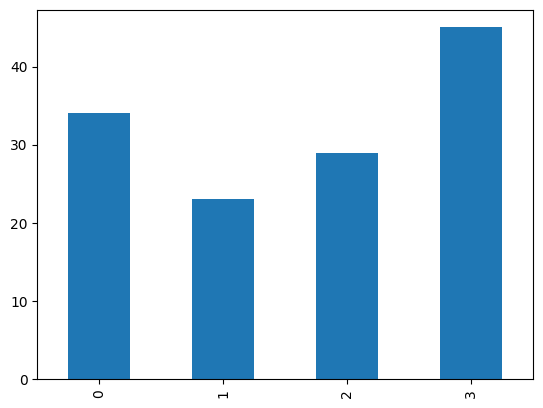

In [14]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()


Dari statistik diatas diketahui data ke-0 "Ali" memiliki umur 34 sehingga grafik menunjukkan 30 lebih sedikit. Data ke-1 "Budi berumur 23 sehingga grafik menunjukkan 20 lebih sedikit. Data ke-3 "Citra" memiliki umur 29 sehinnga grafik menunjukkan hampir ke angka 30. Data ke-4 "Dina" berusia 45 sehingga grafik yang dihasilkan menghasilkan 40 lebih.

- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

      Nama  Usia  TinggiBadan Pekerjaan
0     Joko    34          150    Dokter
1   Susilo    23          160      Guru
2  Bambang    29          170  Insinyur
3    Yudho    45          170   Perawat
            Usia  TinggiBadan
count   4.000000     4.000000
mean   32.750000   162.500000
std     9.322911     9.574271
min    23.000000   150.000000
25%    27.500000   157.500000
50%    31.500000   165.000000
75%    36.750000   170.000000
max    45.000000   170.000000


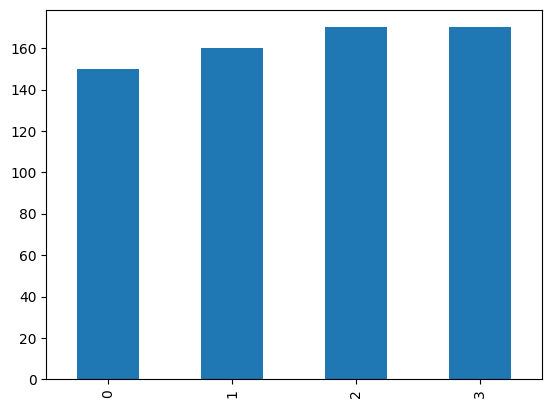

In [25]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Joko", "Susilo", "Bambang", "Yudho"], "Usia": [34, 23, 29, 45], "TinggiBadan":[150,160,170,170]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Joko", "Susilo", "Bambang", "Yudho"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['TinggiBadan'].plot(kind='bar')
plt.show()


Dari statistik diatas diketahui data ke-0 "Ali" memiliki tinggi 150 sehingga grafik menunjukkan 140 lebih dan kurang dari 160. Data ke-1 "Budi dengan tinggi badan 160 sehingga grafik menunjukkan angka 160. Data ke-3 "Citra" memiliki tinggi 170 sehinnga grafik menunjukkan ke angka 160 lebih. Data ke-4 "Dina" tinggi 170 sehinnga grafik menunjukkan ke angka 160 lebih.

### 5. Menggabungkan PySpark dan Pandas
- **Latihan 4: Mengonversi DataFrame antara PySpark dan Pandas**
  Praktik untuk convert DataFrame dari PySpark ke Pandas dan sebaliknya:


In [31]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

Perintah di bawah untuk menampilkan data dalam bentuk pandas dari data spark diatas

In [32]:
# Menampilkan DataFrame hasil konversi
df_pandas_from_spark

,Nama,Usia,TinggiBadan
0,Ali,34,150
1,Budi,23,160
2,Citra,29,170
3,Dina,45,170


Perintah di bawah untuk menampilkan data dalam bentuk spark dari data pandas diatas

In [29]:
df_spark_from_pandas.show()

+-------+----+-----------+
|   Nama|Usia|TinggiBadan|
+-------+----+-----------+
|   Joko|  34|        150|
| Susilo|  23|        160|
|Bambang|  29|        170|
|  Yudho|  45|        170|
+-------+----+-----------+



- **Tugas 5**: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

In [35]:

# Gabungkan kedua DataFrame
df_combined = df.union(df_spark_from_pandas)
df_combined.show()

# Analisis: Menghitung rata-rata usia
df_combined.groupBy().avg("Usia").show()


+-------+----+-----------+
|   Nama|Usia|TinggiBadan|
+-------+----+-----------+
|    Ali|  34|        150|
|   Budi|  23|        160|
|  Citra|  29|        170|
|   Dina|  45|        170|
|   Joko|  34|        150|
| Susilo|  23|        160|
|Bambang|  29|        170|
|  Yudho|  45|        170|
+-------+----+-----------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+



### 6. Konversi Data antara PySpark dan Pandas

In [52]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)



In [53]:
df_pandas_from_spark# Menampilkan DataFrame hasil konversi

,Nama,Usia,TinggiBadan
0,Ali,34,150
1,Budi,23,160
2,Citra,29,170
3,Dina,45,170


In [51]:
df_spark_from_pandas.show()# Menampilkan DataFrame hasil konversi

+-------+----+-----------+
|   Nama|Usia|TinggiBadan|
+-------+----+-----------+
|   Joko|  34|        150|
| Susilo|  23|        160|
|Bambang|  29|        170|
|  Yudho|  45|        170|
+-------+----+-----------+



- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.

In [57]:
# Gabungkan kedua DataFrame PySpark
df_combined = df.union(df_spark_from_pandas)

# Menampilkan DataFrame gabungan
df_combined.show()

# mengubah kombinasi ke pandas
df_pandas_from_combined = df_combined.toPandas()
df_pandas_from_combined

print(df_pandas_from_combined.describe())#Untuk menghitung nilai maksimum usia

+-------+----+-----------+
|   Nama|Usia|TinggiBadan|
+-------+----+-----------+
|    Ali|  34|        150|
|   Budi|  23|        160|
|  Citra|  29|        170|
|   Dina|  45|        170|
|   Joko|  34|        150|
| Susilo|  23|        160|
|Bambang|  29|        170|
|  Yudho|  45|        170|
+-------+----+-----------+

            Usia  TinggiBadan
count   8.000000     8.000000
mean   32.750000   162.500000
std     8.631338     8.864053
min    23.000000   150.000000
25%    27.500000   157.500000
50%    31.500000   165.000000
75%    36.750000   170.000000
max    45.000000   170.000000
